# Exploratory Data Analysis

Produce and explain all graphs, diagram, or any visualization materials that you produce in your assignment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pprint
import plotly.express as px
from pywaffle import Waffle
import squarify
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)

## Composition Chart for Categorical Variable

C:\ProgramData\Anaconda3\lib\site-packages\pywaffle\waffle.py:402: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


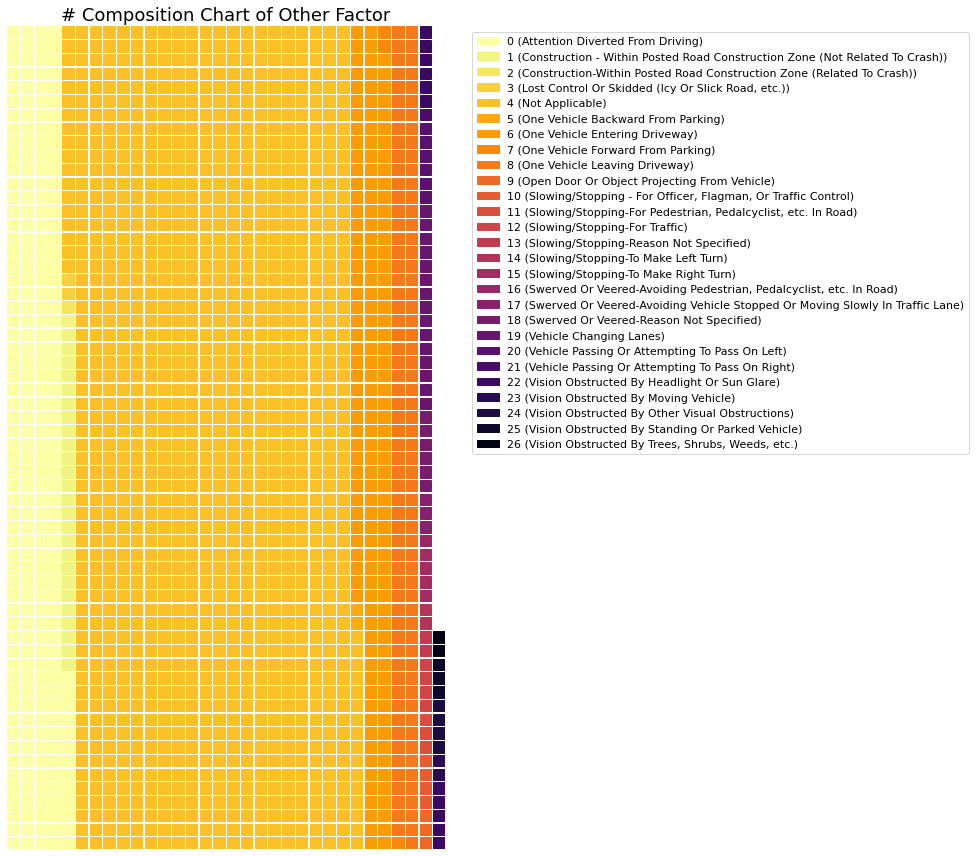

In [3]:
dff = df.groupby("Other Factor").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Other Factor", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 11},
            'title': {'label': '# Composition Chart of Other Factor', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=60,
    colors=colors,
    figsize=(50, 12)
)

C:\ProgramData\Anaconda3\lib\site-packages\pywaffle\waffle.py:402: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



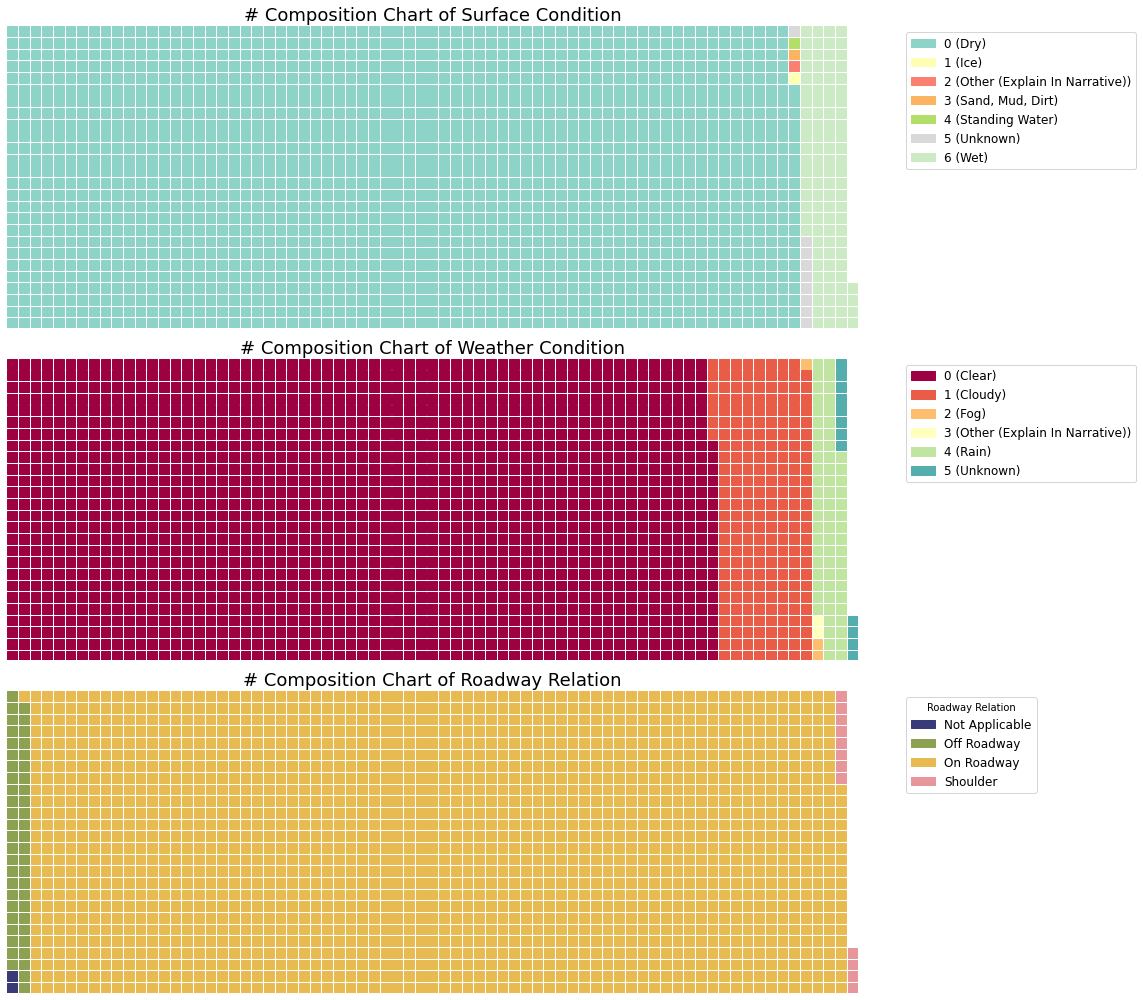

In [9]:
# Prepare Data
# By Surface Condition Data
dff = df.groupby("Surface Condition").size().reset_index(name='counts')
n_categories = dff.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Weather Condition Data
dff1 = df.groupby("Weather Condition").size().reset_index(name='counts')
n_categories = dff1.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
dff2 = df.groupby('Roadway Relation').size().reset_index(name='counts')
n_categories = dff2.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]      
    

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': dff['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff[["Surface Condition", 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Surface Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': dff1['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dff1[["Weather Condition",'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Composition Chart of Weather Condition', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': dff2['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dff2[['Roadway Relation', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':"Roadway Relation"},
            'title': {'label': '# Composition Chart of Roadway Relation', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=26,
    figsize=(16, 14)
)

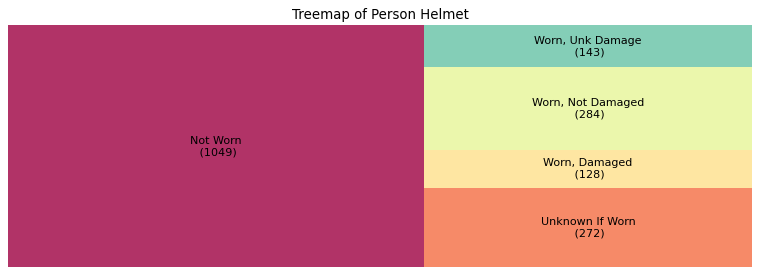

In [5]:
# Prepare Data
df_tree = df.groupby('Person Helmet').size().reset_index(name='counts')
labels = df_tree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_tree['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Person Helmet')
plt.axis('off')
plt.show()


## Visualization for Crash Death and Crash Total Injury by Categorical Variable

### By Categorical Variable Weather Condition 

In [12]:
#prepare data
df_pre1 = df[['Crash Death Count','Weather Condition']].groupby(by='Weather Condition').sum()
df_pre1.sort_values('Crash Death Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x='Weather Condition', y='Crash Death Count',title='Crash Death Count by Weather Condition')

fig.show()

In [13]:
#prepare data
df_pre1 = df[['Crash Total Injury Count','Weather Condition']].groupby(by='Weather Condition').sum()
df_pre1.sort_values('Crash Total Injury Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x='Weather Condition', y='Crash Total Injury Count',title='Crash Total Injury Count by Weather Condition')

fig.show()

### By Categorical Variable Surface Condition

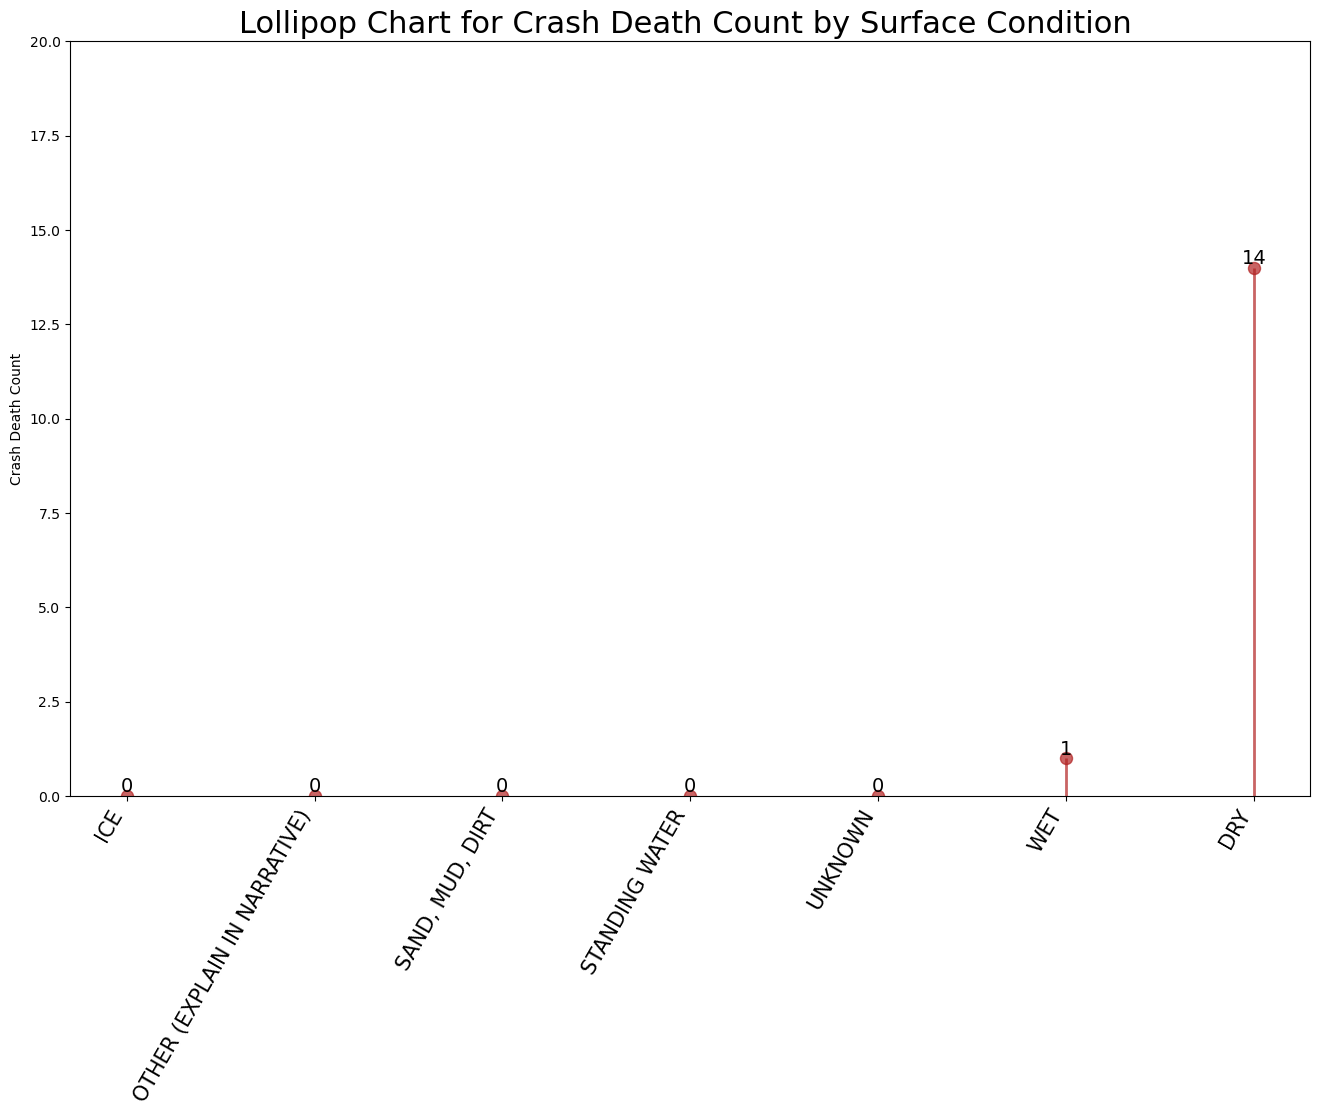

In [28]:
#prepare data
df_pre = df[['Crash Death Count','Surface Condition']].groupby(by='Surface Condition').sum()
df_pre.sort_values('Crash Death Count', inplace=True)
df_pre.reset_index(inplace=True)
df_pre

#plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.vlines(x=df_pre.index, ymin=0, ymax=df_pre['Crash Death Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_pre.index, y=df_pre['Crash Death Count'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Crash Death Count by Surface Condition ', fontdict={'size':22})
ax.set_ylabel('Crash Death Count')
ax.set_xticks(df_pre.index)
ax.set_xticklabels(df_pre["Surface Condition"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0,20)

# Annotate
for row in df_pre.itertuples():
    ax.text(row.Index, row._2, 
    s=round(row._2,4),
    horizontalalignment= 'center',
    verticalalignment= "bottom", fontsize=14)

plt.show()

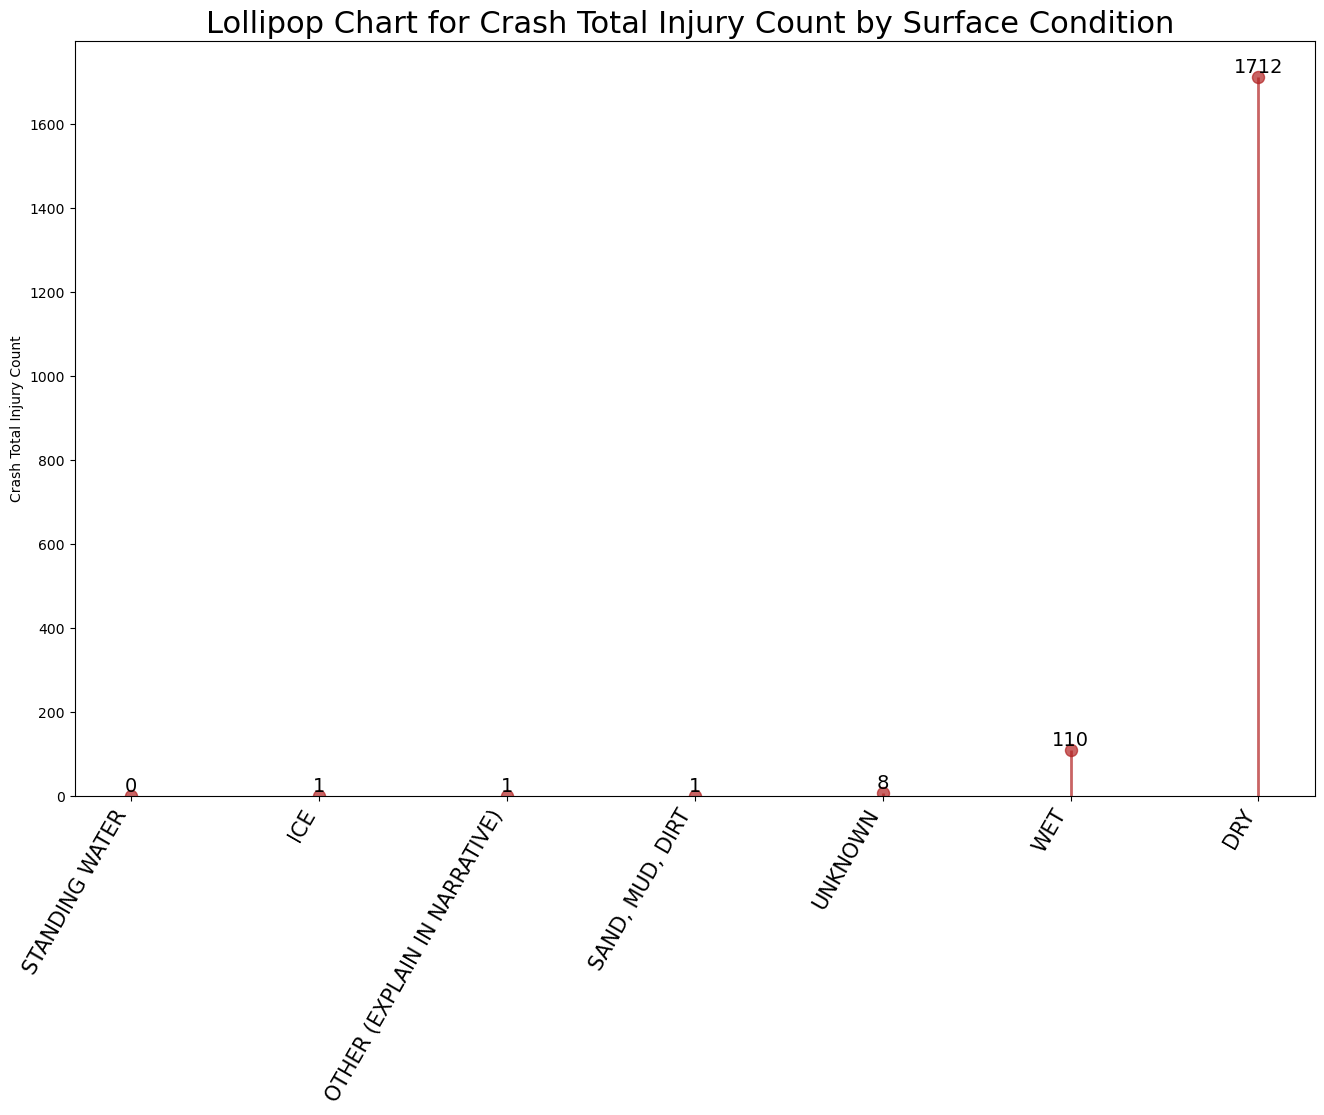

In [26]:
#prepare data
df_pre = df[['Crash Total Injury Count','Surface Condition']].groupby(by='Surface Condition').sum()
df_pre.sort_values('Crash Total Injury Count', inplace=True)
df_pre.reset_index(inplace=True)
df_pre

#plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.vlines(x=df_pre.index, ymin=0, ymax=df_pre['Crash Total Injury Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_pre.index, y=df_pre['Crash Total Injury Count'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Crash Total Injury Count by Surface Condition ', fontdict={'size':22})
ax.set_ylabel('Crash Total Injury Count')
ax.set_xticks(df_pre.index)
ax.set_xticklabels(df_pre["Surface Condition"].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0)

# Annotate
for row in df_pre.itertuples():
    ax.text(row.Index, row._2, 
    s=round(row._2,4),
    horizontalalignment= 'center',
    verticalalignment= "bottom", fontsize=14)

plt.show()

### By Categorical Variable Light Condition

In [11]:
# Data
df_pre0 = df[['Crash Death Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre0.sort_values('Crash Death Count', inplace=True)
df_pre0.reset_index(inplace=True)
df_pre0


fig = px.pie(df_pre0, values='Crash Death Count', names='Light Condition', title='Crash Death Count by Light Condition')
fig.show()

In [38]:
# Data
df_pre0 = df[['Crash Total Injury Count','Light Condition']].groupby(by='Light Condition').sum()
df_pre0.sort_values('Crash Total Injury Count', inplace=True)
df_pre0.reset_index(inplace=True)
df_pre0


fig = px.pie(df_pre0, values='Crash Total Injury Count', names='Light Condition', title='Crash Total Injury Count by Light Condition')
fig.show()

### By Categorical Variable Person Helmet

In [55]:
#prepare data
df_pre1 = df[['Crash Death Count',"Person Helmet"]].groupby(by="Person Helmet").sum()
df_pre1.sort_values('Crash Death Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x="Person Helmet", y='Crash Death Count',title='Crash Death Count by Person Helmet')

fig.show()

In [54]:
#prepare data
df_pre1 = df[['Crash Total Injury Count',"Person Helmet"]].groupby(by="Person Helmet").sum()
df_pre1.sort_values('Crash Total Injury Count', inplace=True)
df_pre1.reset_index(inplace=True)

fig = px.bar(df_pre1, x="Person Helmet", y='Crash Total Injury Count',title='Crash Total Injury Count by Person Helmet')

fig.show()

## Visualization by Crash Year

In [1]:
renaming = ['Crash Death Count', 
	'Crash Incapacitating Injury Count', 
	'Crash Non-incapacitating Injury Count', 
	'Crash Not Injured Count', 
	'Crash Possible Injury Count',
	'Crash Time',
	'Crash Year', 
	'Crash Total Injury Count', 
	'Crash Unknown Injury Count']
renaming[0].replace('Crash ', '')
renaming = {k:k.replace('Crash ', '') for k in renaming}

In [2]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.set_index('Crash ID', inplace=True)
df.drop(['MercatorX', 'MercatorY'], axis=1, inplace=True)
df.rename(columns = renaming,inplace=True)

In [3]:
from bokeh.plotting import figure
from bokeh.palettes import Spectral10
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [4]:
fig = figure(plot_width=900, plot_height=700,
           y_range=(0, 450), x_range=(2010, 2017),
           x_axis_label = 'year', y_axis_label = 'total count',
           title="Austin Bicycle Crashes")
temp = df.groupby("Year").sum()
li = ['Death Count',
 'Incapacitating Injury Count',
 'Non-incapacitating Injury Count',
 'Not Injured Count',
 'Possible Injury Count',
 'Total Injury Count',
 'Unknown Injury Count']
for i, color in zip(li, Spectral10):
    fig.line(y = temp[i], x = temp.index, legend_label = i, color=color, line_width=3)

fig.legend.location = "top_right"
fig.legend.click_policy="mute"

show(fig)